In [1]:
from fastai.vision.all import *

In [2]:
path = '../../data/single_label/'

train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,id,genres
0,71139,Comedy
1,73330,Comedy
2,53693,Documentary
3,121140,Horror
4,45090,Adventure


In [3]:
def get_x(r):
    return path + 'train_data/' + r['id'].astype(str) + '.jpg'

def get_y(r):
    return r['genres']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x = get_x, 
                   get_y = get_y,
                  item_tfms=Resize(256))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


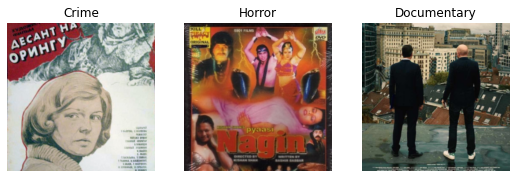

In [4]:
dls = dblock.dataloaders(train_df)
dls.show_batch(nrows=1, ncols=3)

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=7.585775847473997e-07)

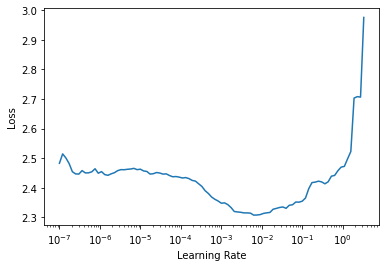

In [5]:
model = xresnet18(n_out=dls.c)
learn = Learner(dls, model, metrics=error_rate)
learn.lr_find()

In [6]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.045636,2.044262,0.718677,26:14
1,2.046192,2.131170,0.771133,26:32
2,2.016429,2.060966,0.728700,25:25
3,1.985647,1.992610,0.698630,25:37
4,1.962456,1.955750,0.698630,28:31
5,1.927602,1.969556,0.705312,30:44
6,1.890397,1.925805,0.672903,26:59
7,1.867750,1.892799,0.673238,26:38
8,1.826639,1.886016,0.666221,28:08
9,1.826509,1.882236,0.671233,26:18


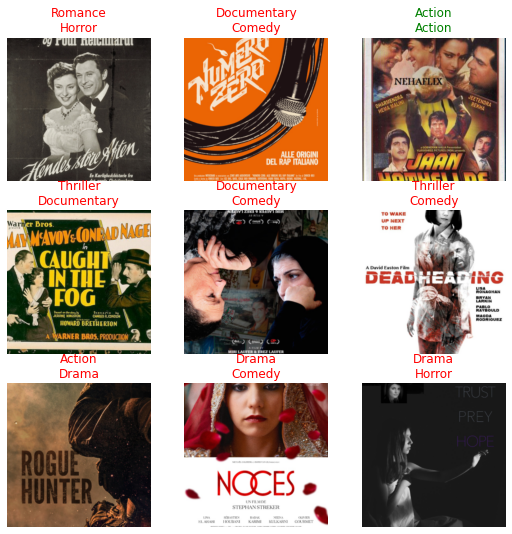

In [7]:
learn.show_results()

In [8]:
learn.save('single_genre_predictor_fastai')

Reference:
https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb